# **Khởi tạo**

**Import thư viện**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import os


**Xử lý dữ liệu**

In [2]:
def read_file(file_name):
    data = pd.read_csv(file_name)

    # Chuyển cột 'Date' thành kiểu dữ liệu datetime và đặt làm index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    # Chuyển đổi các cột khác sang dạng số nếu cần thiết
    data['Price'] = data['Price'].str.replace(',', '').astype(float)
    data = data[['Price']]

    # Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
    data.sort_index(inplace=True)

    return data

**Xây dựng mô hình**

In [3]:
# Hàm tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
def LinearRegression_prediction(name, data, train_test_ratio=0.8, days=30):
    
    # Tính toán số lượng điểm dữ liệu cho tập train và tập test
    train_size = int(len(data) * train_test_ratio)

    # Tạo tập train và tập test
    train = data.iloc[:train_size]
    test = data.iloc[train_size:]

    # Tạo features và target cho tập train và tập test
    X_train, y_train = np.array(range(train_size)).reshape(-1, 1), train['Price'].values
    X_test, y_test = np.array(range(train_size, len(data))).reshape(-1, 1), test['Price'].values

    # Xây dựng mô hình Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Dự đoán giá trên tập test
    y_pred_test = model.predict(X_test)
    
    # Dự đoán giá các ngày tiếp theo (30, 60, 90 ngày)
    days_to_predict = [90, 60, 30]
    future_days_predictions = {}
    for days in days_to_predict:
        next_days_index = np.arange(len(data), len(data) + days +1).reshape(-1, 1)
        y_pred_next_days = model.predict(next_days_index)
        future_days_predictions[days] = y_pred_next_days

    # Đánh giá độ chính xác thuật toán bằng RMSE
    test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
    print('Testing RMSE:', test_rmse)

    # Đánh giá độ chính xác thuật toán bằng MAE
    test_mae = mean_absolute_error(y_test, y_pred_test)
    print('Testing MAE:', test_mae)
    
    # Đánh giá độ chính xác thuật toán bằng MAPE
    test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
    print('Testing MAPE:', test_mape)

    # Trực quan hóa kết quả
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[:train_size], train['Price'], color='blue', label='Train Data')
    plt.plot(data.index[train_size:], test['Price'], color='orange', label='Test Data')
    plt.plot(data.index[train_size:], y_pred_test, color='green', label='Predictions on Test Data')

    # Nối điểm cuối của tập train với điểm đầu của dự đoán trên tập test
    # plt.plot([data.index[train_size - 1], data.index[train_size]], [train['Price'].values[-1], y_pred_test[0]], color='green')

    # Vẽ dự đoán cho 30, 60, 90 ngày tiếp theo trên cùng một biểu đồ
    colors = ['red', 'purple', 'yellow']
    for idx, days in enumerate(days_to_predict):
        plt.plot(pd.date_range(start=data.index[-1], periods=days), future_days_predictions[days][-days:], color=colors[idx], label=f'Next {days} days')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Linear Regression Predictions {name} ({train_test_ratio})')
    plt.legend()
    plt.show()

# **BIDV**

In [5]:
data = read_file("../Dataset/BID Historical Data.csv")
name = 'BIDV'

**BIDV 7:3**

Testing RMSE: 5106.099197918063
Testing MAE: 4029.223482526248
Testing MAPE: 10.700811348418267


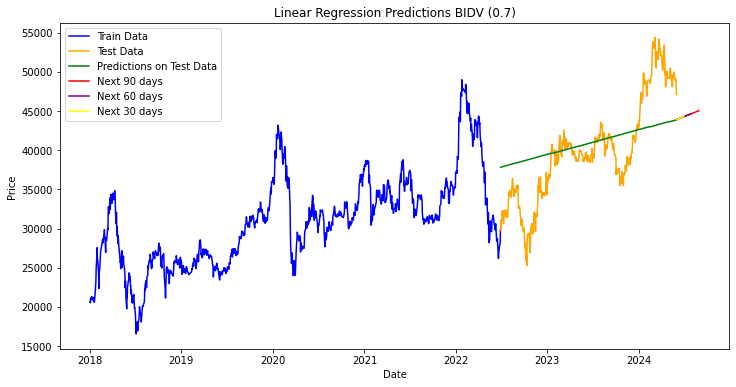

In [6]:
LinearRegression_prediction(name, data, 0.7)

**BIDV 8:2**

Testing RMSE: 5959.578042329382
Testing MAE: 4485.368536100093
Testing MAPE: 9.61804410678303


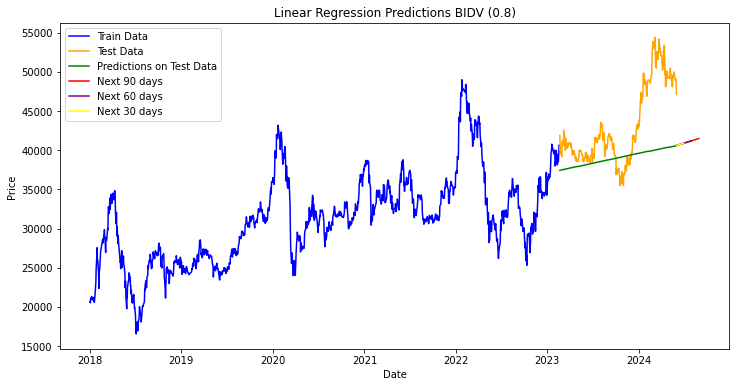

In [7]:
LinearRegression_prediction(name, data, 0.8, 30)

**BIDV 9:1**

Testing RMSE: 7397.3761470473455
Testing MAE: 6358.285515048244
Testing MAPE: 13.152301521729756


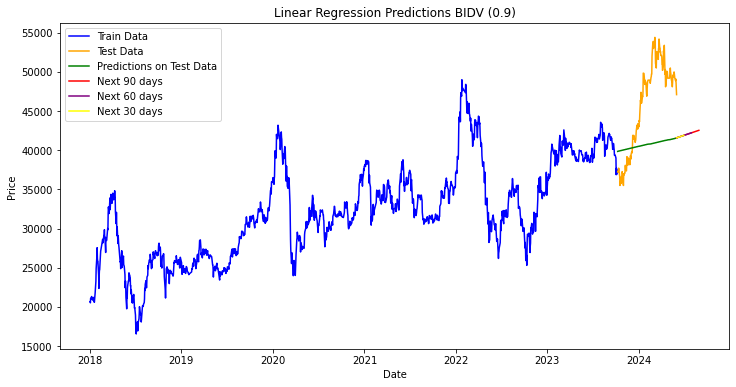

In [8]:
LinearRegression_prediction(name, data, 0.9, 30)

# **VCB**

In [9]:
data = read_file("../Dataset/VCB Historical Data.csv")
name = 'VCB'

**VCB 7:3**

Testing RMSE: 13314.847353528889
Testing MAE: 11406.700880948465
Testing MAPE: 15.909232073044016


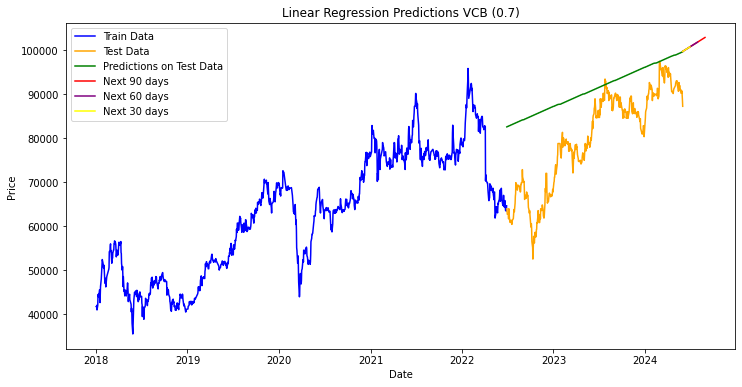

In [10]:
LinearRegression_prediction(name, data, 0.7)

**VCB 8:2**

Testing RMSE: 4906.916198124818
Testing MAE: 4224.515667057275
Testing MAPE: 4.829160990064622


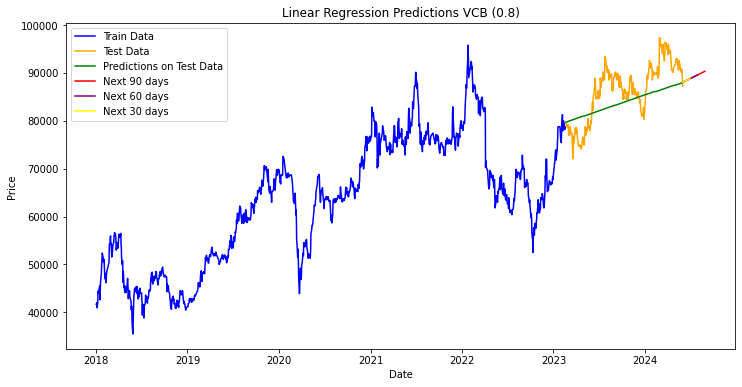

In [11]:
LinearRegression_prediction(name, data, 0.8)

**VCB 9:1**

Testing RMSE: 4402.4378017833615
Testing MAE: 3575.2220427900857
Testing MAPE: 3.911731983715119


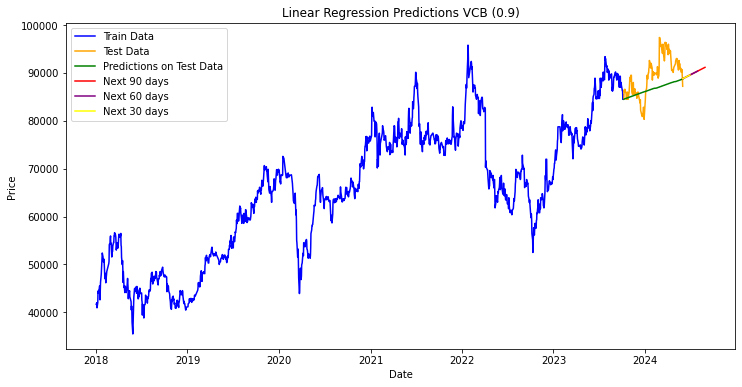

In [12]:
LinearRegression_prediction(name, data, 0.9)

# **MBB**

In [13]:
data = read_file("../Dataset/MBB Historical Data.csv")
name = 'MBB'

**MBB 7:3**

Testing RMSE: 7754.88601004949
Testing MAE: 7467.216762714493
Testing MAPE: 44.47340848985739


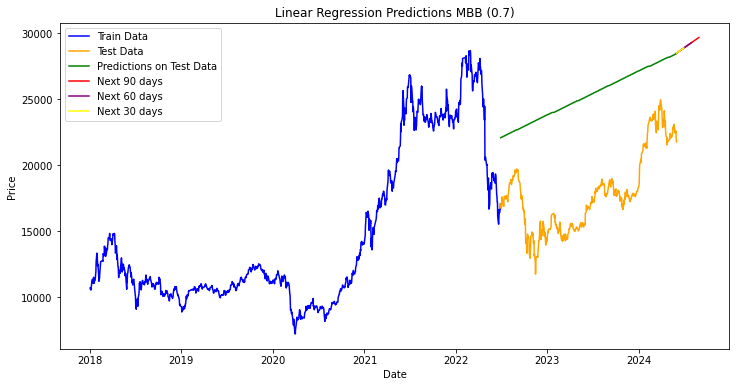

In [14]:
LinearRegression_prediction(name, data, 0.7, 30)

**MBB 8:2**

Testing RMSE: 4385.5940823584315
Testing MAE: 3895.7312304460415
Testing MAPE: 22.978755958962676


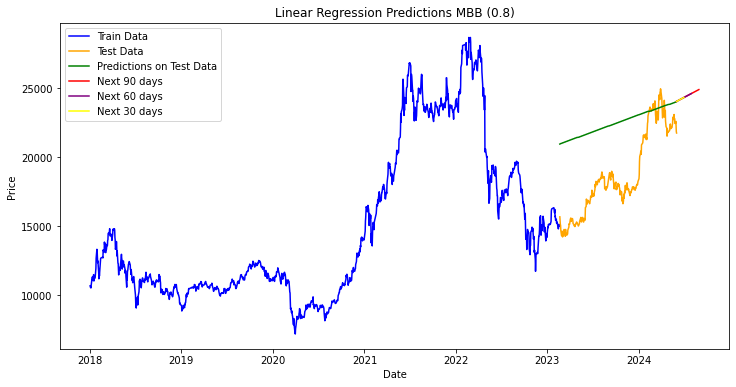

In [15]:
LinearRegression_prediction(name, data, 0.8, 30)

**MBB 9:1**

Testing RMSE: 2318.0051150717272
Testing MAE: 2037.8239423228915
Testing MAPE: 10.359790200394373


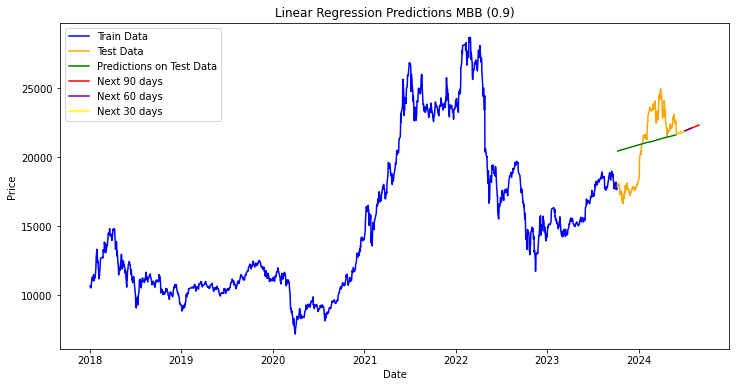

In [16]:
LinearRegression_prediction(name, data, 0.9, 30)